<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Data Analytics Course</font></span>
        <span><br><font size=3>Fall 2022</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Homework 2</font><br>
        <hr />
        <font size=3>TA: <a href="mailto:mersad.esalati@gmail.com">Mersad Esalati</a><br></font><br>
    </div>
</div>

# Beatifulsoup

## News Crawler
News Information:
- Title
- Description
- datetime
- Category
- Agency

In [45]:
# parse news list page
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

### Currency News Crawler

In [97]:
# crawl data + save into csv file
# for 20 pages
final_currency=[]
for i in range(30):
    url_currency ='https://www.tgju.org/news/category/93965/%D8%A7%D8%AE%D8%A8%D8%A7%D8%B1-%D8%A7%D8%B1%D8%B2%DB%8C/page/{}'.format(i)
    response_currency = requests.get(url)
    soup_currency = BeautifulSoup(response_currency.text, 'html.parser')
    div_currency = soup_currency.find_all("div" , attrs={"class" : "news-article-block"})
    #for iterration
    news_num = np.shape(div_currency)[0]
    for j in range(0,news_num):
        raw_currency=[]
        title_currency = soup.select('div > div.news-article-block > div.news-article-min-content > h2')
        tit_currency=title_currency[j].text
        tit_currency=tit_currency.replace('\n','')
        description_currency = soup.select('div > div.news-article-block > div.news-article-min-content > span.news-article-description')
        desc_currency=description_currency[j].text
        desc=desc_currency.replace('\n','')
        datetime_currency = soup.select('div > div.news-article-block > div.news-article-min-content > time')
        date_currency=datetime_currency[j]['datetime']
        category_currency = soup.select('div > div.news-article-block > div.news-article-min-content > a.outline-tag')
        cat_currency=category_currency[j].text
        t=div_currency[j].text
        a=t.find("\n",7)
        b=t.find("\n",a+1)
        agency_currency=t[a+1:b]
        raw_currency.append(tit_currency)
        raw_currency.append(desc_currency)
        raw_currency.append(date_currency)
        raw_currency.append(cat_currency)
        raw_currency.append(agency_currency)
        
        final_currency.append(raw_currency)
df_currency = pd.DataFrame(final_currency[0:], columns=['Title','Description','datetime','Category','Agency'])
df_currency = df_currency.replace(',','', regex=True)
df_currency.to_csv('currency.csv' , encoding='UTF-8' , na_rep='NaN')

C:\Users\AU\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


### Gold News Crawler

In [98]:
# crawl data + save into csv file
final_gold=[]
#for 20 pages
for i in range(30):
    
    url_gold='https://www.tgju.org/news/category/93964/%D8%A7%D8%AE%D8%A8%D8%A7%D8%B1-%D8%B7%D9%84%D8%A7-%D9%88-%D8%B3%DA%A9%D9%87/page/{}'.format(i)
    response_gold = requests.get(url)
    soup_gold = BeautifulSoup(response_gold.text, 'html.parser')
    div_gold = soup.find_all("div" , attrs={"class" : "news-article-block"})
    #for iteration
    news_num=np.shape(div_gold)[0]
    
    for j in range(0,news_num):
        raw_gold=[]
        title_gold = soup.select('div > div.news-article-block > div.news-article-min-content > h2')
        tit_gold=title_gold[j].text
        tit_gold=tit_gold.replace('\n','')
        description_gold = soup.select('div > div.news-article-block > div.news-article-min-content > span.news-article-description')
        desc_gold=description_gold[j].text
        desc_gold=desc_gold.replace('\n','')
        datetime_gold = soup.select('div > div.news-article-block > div.news-article-min-content > time')
        date_gold=datetime_gold[j]['datetime']
        category_gold = soup.select('div > div.news-article-block > div.news-article-min-content > a.outline-tag')
        cat_gold=category_gold[j].text
        t=div_gold[j].text
        a=t.find("\n",7)
        b=t.find("\n",a+1)
        agency_gold=t[a+1:b]
        raw_gold.append(tit_gold)
        raw_gold.append(desc_gold)
        raw_gold.append(date_gold)
        raw_gold.append(cat_gold)
        raw_gold.append(agency_gold)
        final_gold.append(raw_gold)
df_gold = pd.DataFrame(final_gold[0:], columns=['Title','Description','datetime','Category','Agency'])
df_gold = df_gold.replace(',','', regex=True)
df_gold.to_csv('gold.csv' , encoding='UTF-8' , na_rep='NaN')

C:\Users\AU\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


## Question 1: Top Agency

In [121]:
df_currency_trend=df_currency.groupby(pd.Grouper(key="Agency")).count()
df_currency_trend=df_currency_trend.sort_values('Title' , ascending=False)
(df_currency_trend.head(5))

,Title,Description,datetime,Category
Agency,,,,
ایران اکونومیست,150,150,150,150
اقتصاد آنلاین,120,120,120,120
سایت طلا,60,60,60,60
اقتصاد نیوز,60,60,60,60
مشرق,30,30,30,30


In [100]:
df_gold_trend=df_gold.groupby(pd.Grouper(key="Agency")).count()
df_gold_trend=df_gold_trend.sort_values('Title' , ascending=False)
(df_gold_trend.head(5))

,Title,Description,datetime,Category
Agency,,,,
اقتصاد آنلاین,150,150,150,150
ایران اکونومیست,150,150,150,150
اقتصاد نیوز,60,60,60,60
مشرق,30,30,30,30
ایرنا,30,30,30,30


## Question 2: Daily News Trend

C:\Users\AU\AppData\Local\Temp\ipykernel_18976\2115027442.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_currency.iloc[j]['datetime']=b[0]


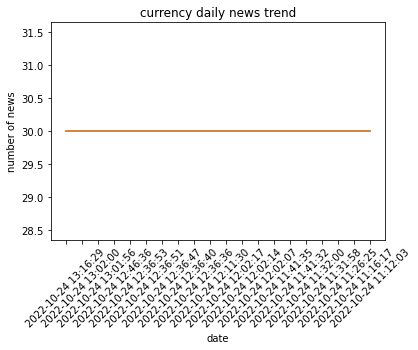

In [127]:
#currency
j=0
for i in df_currency[:]['datetime']:
    b=i.split(' ')
    df_currency.iloc[j]['datetime']=b[0]
    j=j+1
#based on recent date=trend
df_currency_date=df_currency.groupby(pd.Grouper(key="datetime")).count()
df_currency_date.sort_values('datetime') 
#plot
fig ,x = plt.subplots()
plt.title('currency daily news trend')
plt.xlabel('date')
plt.ylabel('number of news')
x.plot(df_currency_date.index,df_currency_date.iloc[:]['Category'])
x.set_xticks(df_currency_date.index)
x.set_xticklabels(df_currency_date.index, rotation=45)
plt.plot(df_currency_date.index,df_currency_date.iloc[:]['Category'])


C:\Users\AU\AppData\Local\Temp\ipykernel_18976\1127263291.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gold.iloc[j]['datetime']=b[0]


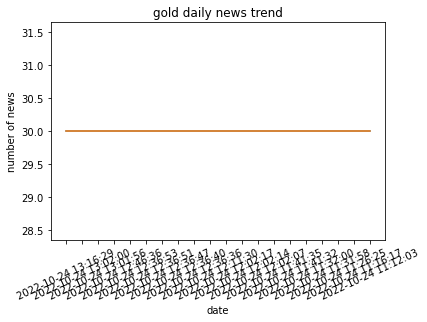

In [129]:
#gold 
j=0
for i in df_gold[:]['datetime']:
    b=i.split(' ')
    df_gold.iloc[j]['datetime']=b[0]
    j=j+1
#based on recent date=trend
df_gold_date=df_gold.groupby(pd.Grouper(key="datetime")).count()
df_gold_date.sort_values('datetime')
#plot
fig, x = plt.subplots()
plt.title('gold daily news trend')
plt.xlabel('date')
plt.ylabel('number of news')
x.plot(df_gold_date.index,df_gold_date.iloc[:]['Title'])
x.set_xticks(df_gold_date.index)
x.set_xticklabels(df_gold_date.index, rotation=25)
plt.plot(df_gold_date.index,df_gold_date.iloc[:]['Title'])